### 🚗 Car Price Prediction

In [99]:
import pandas as pd
import numpy as np

# Import metrics libraries
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

# Visualization libraries
import seaborn as sns
import matplotlib.pyplot as plt

# Train and Test split data
from sklearn.model_selection import train_test_split

# Import Model libraries
from sklearn.linear_model import Ridge
from sklearn.ensemble import RandomForestRegressor
from sklearn.linear_model import Lasso
from xgboost import XGBRegressor
from sklearn.svm import SVR
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import AdaBoostRegressor
from sklearn.ensemble import GradientBoostingRegressor

# Import warnings ignore libraries
import warnings as wg
wg.filterwarnings('ignore')
pd.set_option('display.max_columns', None)

In [161]:
df = pd.read_csv('Australian Vehicle Prices.csv')

In [101]:
df.isnull().sum()

Brand                   1
Year                    1
Model                   1
Car/Suv                28
Title                   1
UsedOrNew               1
Transmission            1
Engine                  1
DriveType               1
FuelType                1
FuelConsumption         1
Kilometres              1
ColourExtInt            1
Location              450
CylindersinEngine       1
BodyType              282
Doors                1604
Seats                1705
Price                   3
dtype: int64

In [102]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16734 entries, 0 to 16733
Data columns (total 19 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Brand              16733 non-null  object 
 1   Year               16733 non-null  float64
 2   Model              16733 non-null  object 
 3   Car/Suv            16706 non-null  object 
 4   Title              16733 non-null  object 
 5   UsedOrNew          16733 non-null  object 
 6   Transmission       16733 non-null  object 
 7   Engine             16733 non-null  object 
 8   DriveType          16733 non-null  object 
 9   FuelType           16733 non-null  object 
 10  FuelConsumption    16733 non-null  object 
 11  Kilometres         16733 non-null  object 
 12  ColourExtInt       16733 non-null  object 
 13  Location           16284 non-null  object 
 14  CylindersinEngine  16733 non-null  object 
 15  BodyType           16452 non-null  object 
 16  Doors              151

In [103]:
df.shape

(16734, 19)

In [104]:
# Let's look at unique numbers
for i in df.columns:
    print(f'{i}:  <{df[i].nunique()}>')

Brand:  <76>
Year:  <45>
Model:  <781>
Car/Suv:  <618>
Title:  <8804>
UsedOrNew:  <3>
Transmission:  <3>
Engine:  <106>
DriveType:  <5>
FuelType:  <9>
FuelConsumption:  <157>
Kilometres:  <14262>
ColourExtInt:  <834>
Location:  <618>
CylindersinEngine:  <11>
BodyType:  <10>
Doors:  <13>
Seats:  <13>
Price:  <3794>


In [105]:
# Model:
df['Model'].unique()
all_models = []
for group_name, group_data in df.groupby('Brand'):
    brand = group_name
    unique_models = group_data['Model'].unique()
    all_models.extend(unique_models)
    print(brand, list(unique_models))

Abarth ['595', '695']
Alfa ['Romeo']
Aston ['Martin']
Audi ['A5', 'Q7', 'Q3', 'RS3', 'A3', 'A4', 'SQ5', 'Q2', 'Q5', 'S3', 'R8', 'SQ7', 'A7', 'A1', 'A6', 'RS4', 'RS', 'S5', 'TT', 'A8', 'S4', 'RS6', 'RS5', 'Q8', 'E-Tron', 'SQ2', 'SQ8']
BMW ['430I', 'X3', '118D', '3', '220I', 'X4', '118I', 'M135I', '330I', 'X1', 'M4', 'M140I', '218I', '320D', 'X5', '320I', 'M5', '4', '116I', '420I', '328I', 'Z4', 'M2', 'X6', '225I', '5', '330D', 'I8', 'M240I', 'M340I', '6', '428I', 'M235I', '1', '435I', '230I', '320CI', 'X2', 'IX', 'X7', '218D', '135I', 'M3', 'M8', '2', '128TI', '740I', '7', '220D', '125I', '228I', 'M6', '318I', 'I4', '335I', '330CI', '323I', '520D', '340I', '530I', '120D', '740LI', '525I', '420D', '730D', '120I', '316I', '530D', '325I', 'I3', 'Alpina', '8', '520I', '530E', 'M440I', '2002']
BYD ['Atto', 'T3']
Bentley ['Mulsanne', 'Continental', 'Arnage', 'Flying']
Caterham ['Seven']
Chery ['J3', 'Omoda5', 'J11']
Chevrolet ['Silverado', 'Corvette']
Chrysler ['300', 'Sebring', '300C', 'Gran

In [106]:
# Let's look at columns
df.columns

Index(['Brand', 'Year', 'Model', 'Car/Suv', 'Title', 'UsedOrNew',
       'Transmission', 'Engine', 'DriveType', 'FuelType', 'FuelConsumption',
       'Kilometres', 'ColourExtInt', 'Location', 'CylindersinEngine',
       'BodyType', 'Doors', 'Seats', 'Price'],
      dtype='object')

In [107]:
# Let's remove some column
df.drop(['Title','ColourExtInt'],axis=1,inplace=True)

In [108]:
df.head()

,Brand,Year,Model,Car/Suv,UsedOrNew,Transmission,Engine,DriveType,FuelType,FuelConsumption,Kilometres,Location,CylindersinEngine,BodyType,Doors,Seats,Price
0,Ssangyong,2022.0,Rexton,Sutherland Isuzu Ute,DEMO,Automatic,"4 cyl, 2.2 L",AWD,Diesel,8.7 L / 100 km,5595,"Caringbah, NSW",4 cyl,SUV,4 Doors,7 Seats,51990
1,MG,2022.0,MG3,Hatchback,USED,Automatic,"4 cyl, 1.5 L",Front,Premium,6.7 L / 100 km,16,"Brookvale, NSW",4 cyl,Hatchback,5 Doors,5 Seats,19990
2,BMW,2022.0,430I,Coupe,USED,Automatic,"4 cyl, 2 L",Rear,Premium,6.6 L / 100 km,8472,"Sylvania, NSW",4 cyl,Coupe,2 Doors,4 Seats,108988
3,Mercedes-Benz,2011.0,E500,Coupe,USED,Automatic,"8 cyl, 5.5 L",Rear,Premium,11 L / 100 km,136517,"Mount Druitt, NSW",8 cyl,Coupe,2 Doors,4 Seats,32990
4,Renault,2022.0,Arkana,SUV,USED,Automatic,"4 cyl, 1.3 L",Front,Unleaded,6 L / 100 km,1035,"Castle Hill, NSW",4 cyl,SUV,4 Doors,5 Seats,34990


In [109]:
# Let's create if there are suv word then we write 1 otherwise write 0
df['Car/Suv_1'] = df['Car/Suv'].apply(lambda x: 1 if 'suv' in str(x).lower() else 2)

In [110]:
# Let's encode labels
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
temp = ['Brand' ,
        'Year' ,
        'Car/Suv' ,
        'UsedOrNew' ,
        'Transmission' ,
        'DriveType' ,
        'FuelType' ,
        'BodyType']
# Dictionary to store label mappings
label_mappings = {}  

for col in temp:
    df[col] = le.fit_transform(df[col])
    label_mappings[col] = dict(zip(le.classes_, le.transform(le.classes_)))

In [111]:
df.head()

,Brand,Year,Model,Car/Suv,UsedOrNew,Transmission,Engine,DriveType,FuelType,FuelConsumption,Kilometres,Location,CylindersinEngine,BodyType,Doors,Seats,Price,Car/Suv_1
0,68,43,Rexton,509,0,1,"4 cyl, 2.2 L",1,1,8.7 L / 100 km,5595,"Caringbah, NSW",4 cyl,6,4 Doors,7 Seats,51990,2
1,46,43,MG3,227,2,1,"4 cyl, 1.5 L",2,7,6.7 L / 100 km,16,"Brookvale, NSW",4 cyl,3,5 Doors,5 Seats,19990,2
2,4,43,430I,161,2,1,"4 cyl, 2 L",4,7,6.6 L / 100 km,8472,"Sylvania, NSW",4 cyl,2,2 Doors,4 Seats,108988,2
3,51,32,E500,161,2,1,"8 cyl, 5.5 L",4,7,11 L / 100 km,136517,"Mount Druitt, NSW",8 cyl,2,2 Doors,4 Seats,32990,2
4,62,43,Arkana,469,2,1,"4 cyl, 1.3 L",2,8,6 L / 100 km,1035,"Castle Hill, NSW",4 cyl,6,4 Doors,5 Seats,34990,1


In [112]:
# Edit Engine column
df['Engine'] = df['Engine'].str.split(',').str[1].str.split(' ').str[1]
df['Engine'].fillna(0,inplace = True)
df['Engine'] = df['Engine'].astype(float)

In [113]:
# Edit CylindersinEngine column
df['CylindersinEngine'] = df['CylindersinEngine'].str.split(' ').str[0]

In [114]:
# Edit Doors column
df['Doors'] = df['Doors'].str.split(' ').str[1]
df['Doors'].fillna('1',inplace = True)
df['Doors'] = df['Doors'].astype(int)

In [115]:
# Edit Seats column
df['Seats'] = df['Seats'].str.split(' ').str[1]
df['Seats'].fillna('1',inplace = True)
df['Seats'] = df['Seats'].astype(int)

In [116]:
# Edit FuelConsumption column
df[['FuelConsumption', 'Unit']] = df['FuelConsumption'].str.split(' / ', expand=True)
df['FuelConsumption'] = df['FuelConsumption'].str.replace('L', '').str.strip()
df['FuelConsumption'] = df['FuelConsumption'].replace({'-': '0'})
df['FuelConsumption'] = df['FuelConsumption'].astype(float)
del df['Unit']

In [117]:
# Let's convert string price column to int
df = df[~df['Price'].isna()]
df = df[df['Price'] != 'POA']
df['Price'] = df['Price'].astype(float)

In [118]:
# Edit Location column
df['Location'].unique()
df['Location'] = df['Location'].str.split(', ').str[1]
sort_dict = {}
sorted_groups = sorted(df.groupby('Location'), key=lambda x: x[1]['Price'].mean(), reverse=True)
for g in sorted_groups:
    average = g[1]['Price'].mean()
    sort_dict[g[0]] = round(average)
sorted_data = {k: i for i, (k, v) in enumerate(sorted(sort_dict.items(), key=lambda item: item[1]))}
df['Location'] = df['Location'].replace(sorted_data)
df['Location'].fillna('9',inplace = True)
df['Location'] =  df['Location'].astype(float)

In [119]:
sort_dict

{'NT': 37237,
 'TAS': 37172,
 'WA': 36954,
 'NSW': 36547,
 'VIC': 35605,
 'ACT': 34044,
 'QLD': 32348,
 'SA': 32299,
 'AU-VIC': 22000}

In [120]:
# Edit Kilometres column
df[df['Kilometres'] == '-']['Price'].mean() # 48614.56349206349
df[df['Kilometres'] == '- / -']['Price'].mean() # 106041.86191536748
df = df[~df['Kilometres'].isin(['-','- / -'])]
df['Kilometres'] = df['Kilometres'].astype(float)

In [121]:
df.head()

,Brand,Year,Model,Car/Suv,UsedOrNew,Transmission,Engine,DriveType,FuelType,FuelConsumption,Kilometres,Location,CylindersinEngine,BodyType,Doors,Seats,Price,Car/Suv_1
0,68,43,Rexton,509,0,1,2.2,1,1,8.7,5595.0,5.0,4,6,4,7,51990.0,2
1,46,43,MG3,227,2,1,1.5,2,7,6.7,16.0,5.0,4,3,5,5,19990.0,2
2,4,43,430I,161,2,1,2.0,4,7,6.6,8472.0,5.0,4,2,2,4,108988.0,2
3,51,32,E500,161,2,1,5.5,4,7,11.0,136517.0,5.0,8,2,2,4,32990.0,2
4,62,43,Arkana,469,2,1,1.3,2,8,6.0,1035.0,5.0,4,6,4,5,34990.0,1


In [122]:
# Column data types
df.dtypes

Brand                  int32
Year                   int64
Model                 object
Car/Suv                int32
UsedOrNew              int32
Transmission           int32
Engine               float64
DriveType              int32
FuelType               int32
FuelConsumption      float64
Kilometres           float64
Location             float64
CylindersinEngine     object
BodyType               int32
Doors                  int32
Seats                  int32
Price                float64
Car/Suv_1              int64
dtype: object

In [123]:
# Let's group by CylindersinEngine columns and examine average price
for i in df.groupby(by = 'CylindersinEngine'):
    print(i[0], i[1]['Price'].mean())

- 39067.34069981584
0 83301.87777777777
10 182960.0
12 247584.0909090909
2 13492.5
3 30005.115894039736
4 30881.98495359942
5 36292.2731829574
6 39310.149697580644
8 85063.08034188034


In [124]:
# Edit CylindersinEngine columns
df[df['CylindersinEngine'] == '-'] = 6
df['CylindersinEngine'] =  df['CylindersinEngine'].astype(float)

In [125]:
# Columns datatype
df.dtypes

Brand                  int32
Year                   int64
Model                 object
Car/Suv                int32
UsedOrNew              int32
Transmission           int32
Engine               float64
DriveType              int32
FuelType               int32
FuelConsumption      float64
Kilometres           float64
Location             float64
CylindersinEngine    float64
BodyType               int32
Doors                  int32
Seats                  int32
Price                float64
Car/Suv_1              int64
dtype: object

In [126]:
# Shape of dataframe
df.shape

(16106, 18)

In [127]:
df.head()

,Brand,Year,Model,Car/Suv,UsedOrNew,Transmission,Engine,DriveType,FuelType,FuelConsumption,Kilometres,Location,CylindersinEngine,BodyType,Doors,Seats,Price,Car/Suv_1
0,68,43,Rexton,509,0,1,2.2,1,1,8.7,5595.0,5.0,4.0,6,4,7,51990.0,2
1,46,43,MG3,227,2,1,1.5,2,7,6.7,16.0,5.0,4.0,3,5,5,19990.0,2
2,4,43,430I,161,2,1,2.0,4,7,6.6,8472.0,5.0,4.0,2,2,4,108988.0,2
3,51,32,E500,161,2,1,5.5,4,7,11.0,136517.0,5.0,8.0,2,2,4,32990.0,2
4,62,43,Arkana,469,2,1,1.3,2,8,6.0,1035.0,5.0,4.0,6,4,5,34990.0,1


In [128]:
df[df['Price']==6.0]
# Bad data

,Brand,Year,Model,Car/Suv,UsedOrNew,Transmission,Engine,DriveType,FuelType,FuelConsumption,Kilometres,Location,CylindersinEngine,BodyType,Doors,Seats,Price,Car/Suv_1
5,6,6,6,6,6,6,6.0,6,6,6.0,6.0,6.0,6.0,6,6,6,6.0,6
10,6,6,6,6,6,6,6.0,6,6,6.0,6.0,6.0,6.0,6,6,6,6.0,6
12,6,6,6,6,6,6,6.0,6,6,6.0,6.0,6.0,6.0,6,6,6,6.0,6
13,6,6,6,6,6,6,6.0,6,6,6.0,6.0,6.0,6.0,6,6,6,6.0,6
17,6,6,6,6,6,6,6.0,6,6,6.0,6.0,6.0,6.0,6,6,6,6.0,6
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
16712,6,6,6,6,6,6,6.0,6,6,6.0,6.0,6.0,6.0,6,6,6,6.0,6
16723,6,6,6,6,6,6,6.0,6,6,6.0,6.0,6.0,6.0,6,6,6,6.0,6
16726,6,6,6,6,6,6,6.0,6,6,6.0,6.0,6.0,6.0,6,6,6,6.0,6
16729,6,6,6,6,6,6,6.0,6,6,6.0,6.0,6.0,6.0,6,6,6,6.0,6


In [129]:
df = df[df['Price'] != 6.0]

#### Outliers

In [130]:
# Let's remove outliers from dataframe
for i in ['Price','Kilometres']:
    q1 = np.percentile(df[i],25)
    q3 = np.percentile(df[i],75)
    iqr = q3 - q1
    below_out = q1 - 1.5*iqr
    above_out = q3 + 1.5*iqr
    df = df[(df[i]>below_out) & (df[i]<above_out)]

In [131]:
# New data frame shape
df.shape

(13499, 18)

In [132]:
# Let's create dictionary
model_dict = {}
for i in df.groupby(by = 'Model'):
    model_dict[i[0]] = i[1]['Price'].mean() 
model_dict = dict(sorted(model_dict.items(), key=lambda item: item[1]))

In [170]:
model_dict

{'Festiva': 2500.0,
 'Sebring': 2822.5,
 '323': 3925.0,
 '320CI': 3999.0,
 'Roomster': 3999.0,
 'Laser': 4990.0,
 'S40': 4990.0,
 '3-Sep': 5400.0,
 '380': 5744.666666666667,
 'Fortwo': 5985.0,
 '121': 5990.0,
 '318I': 5990.0,
 'Vectra': 5990.0,
 'XL-7': 5990.0,
 'E240': 5999.0,
 'Magna': 6474.0,
 'Epica': 6943.5,
 'A190': 6990.0,
 'Laguna': 6990.0,
 'Trajet': 6990.0,
 '307': 6999.0,
 'A170': 6999.0,
 'APV': 6999.0,
 'Celica': 6999.0,
 'Tribute': 7135.6,
 'MPV': 7486.75,
 '525I': 7499.0,
 'Getz': 7697.133333333333,
 'Echo': 7705.571428571428,
 '407': 7744.5,
 'ES300': 7888.0,
 'Avalon': 7894.5,
 'PT': 7985.0,
 'S16': 7990.0,
 'Viva': 7995.0,
 'J11': 7999.0,
 'S430': 7999.0,
 'Spectra': 7999.0,
 'Terracan': 8110.0,
 'Courier': 8399.0,
 'Tiida': 8627.57142857143,
 'B2500': 8990.0,
 'Panda': 8990.0,
 'Punto': 8990.0,
 'Verada': 8990.0,
 'SX4': 9463.833333333334,
 'Avensis': 9467.0,
 'DS3': 9777.0,
 '207': 9794.0,
 'Micra': 9818.083333333334,
 '120D': 9900.0,
 'V50': 9990.0,
 'Adventra': 99

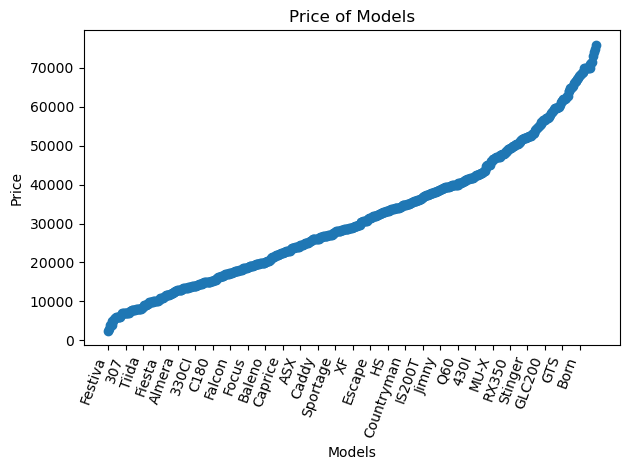

In [133]:
# Let's look at models and its prices 
plt.plot(model_dict.keys(), model_dict.values(), marker='o')
plt.xticks(rotation=70, ha='right')  
n = 20
plt.xticks(list(model_dict.keys())[::n])

plt.xlabel('Models')
plt.ylabel('Price')
plt.title('Price of Models')
plt.tight_layout()
plt.show()

In [134]:
Model_updated = {key: 0 if value < 20000 else (1 if value < 40000 else (2 if value < 60000 else (3 if value >= 60000 else 0))) for key, value in model_dict.items()}

In [135]:
Model_updated

{'Festiva': 0,
 'Sebring': 0,
 '323': 0,
 '320CI': 0,
 'Roomster': 0,
 'Laser': 0,
 'S40': 0,
 '3-Sep': 0,
 '380': 0,
 'Fortwo': 0,
 '121': 0,
 '318I': 0,
 'Vectra': 0,
 'XL-7': 0,
 'E240': 0,
 'Magna': 0,
 'Epica': 0,
 'A190': 0,
 'Laguna': 0,
 'Trajet': 0,
 '307': 0,
 'A170': 0,
 'APV': 0,
 'Celica': 0,
 'Tribute': 0,
 'MPV': 0,
 '525I': 0,
 'Getz': 0,
 'Echo': 0,
 '407': 0,
 'ES300': 0,
 'Avalon': 0,
 'PT': 0,
 'S16': 0,
 'Viva': 0,
 'J11': 0,
 'S430': 0,
 'Spectra': 0,
 'Terracan': 0,
 'Courier': 0,
 'Tiida': 0,
 'B2500': 0,
 'Panda': 0,
 'Punto': 0,
 'Verada': 0,
 'SX4': 0,
 'Avensis': 0,
 'DS3': 0,
 '207': 0,
 'Micra': 0,
 '120D': 0,
 'V50': 0,
 'Adventra': 0,
 'Fairlane': 0,
 'C3': 0,
 'MB100': 0,
 'Maxima': 0,
 'Combo': 0,
 'Cruze': 0,
 'Barina': 0,
 'Fiesta': 0,
 'Alto': 0,
 'DS4': 0,
 'Jackaroo': 0,
 'Pulsar': 0,
 'Rodeo': 0,
 'CX-7': 0,
 'Aurion': 0,
 'ML320': 0,
 'Commander': 0,
 'Dualis': 0,
 'Kizashi': 0,
 'Estima': 0,
 'Murano': 0,
 'C30': 0,
 'B180': 0,
 'Jetta': 0,
 'I

In [136]:
df['Model'] = df['Model'].map(Model_updated)

In [137]:
df.head()

,Brand,Year,Model,Car/Suv,UsedOrNew,Transmission,Engine,DriveType,FuelType,FuelConsumption,Kilometres,Location,CylindersinEngine,BodyType,Doors,Seats,Price,Car/Suv_1
0,68,43,2,509,0,1,2.2,1,1,8.7,5595.0,5.0,4.0,6,4,7,51990.0,2
1,46,43,0,227,2,1,1.5,2,7,6.7,16.0,5.0,4.0,3,5,5,19990.0,2
3,51,32,1,161,2,1,5.5,4,7,11.0,136517.0,5.0,8.0,2,2,4,32990.0,2
4,62,43,2,469,2,1,1.3,2,8,6.0,1035.0,5.0,4.0,6,4,5,34990.0,1
6,43,38,2,469,2,1,2.0,1,1,5.1,67662.0,5.0,4.0,6,2,4,62280.0,1


#### Correlation

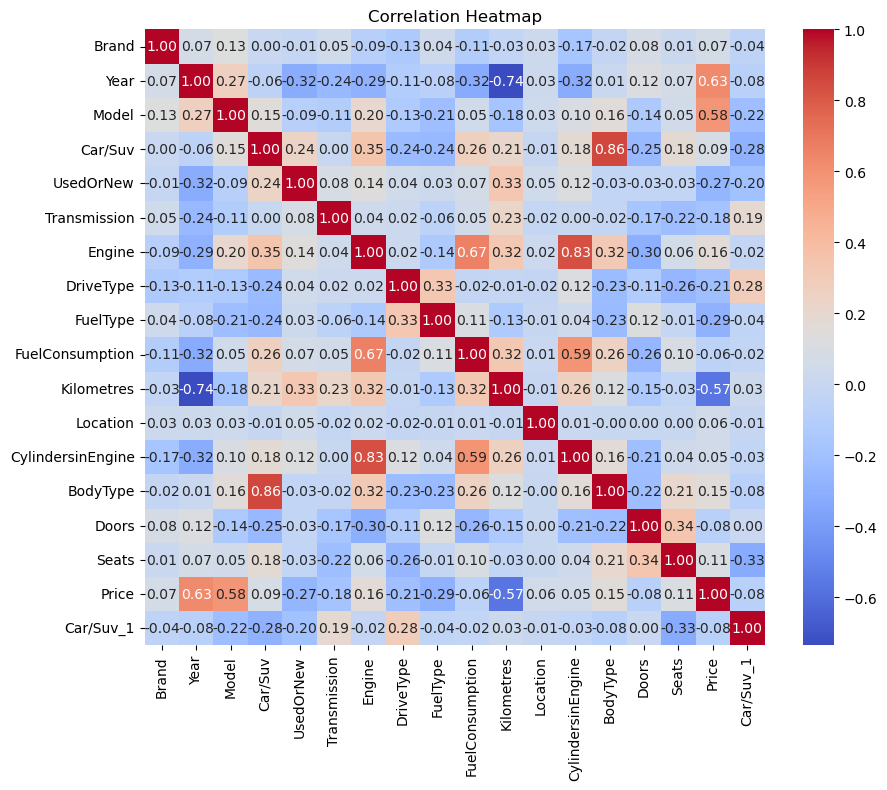

In [138]:
# Plot the correlation heatmap
corr = df.corr()
plt.figure(figsize=(10, 8))
sns.heatmap(corr, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation Heatmap')
plt.show()

In [139]:
df.head()

,Brand,Year,Model,Car/Suv,UsedOrNew,Transmission,Engine,DriveType,FuelType,FuelConsumption,Kilometres,Location,CylindersinEngine,BodyType,Doors,Seats,Price,Car/Suv_1
0,68,43,2,509,0,1,2.2,1,1,8.7,5595.0,5.0,4.0,6,4,7,51990.0,2
1,46,43,0,227,2,1,1.5,2,7,6.7,16.0,5.0,4.0,3,5,5,19990.0,2
3,51,32,1,161,2,1,5.5,4,7,11.0,136517.0,5.0,8.0,2,2,4,32990.0,2
4,62,43,2,469,2,1,1.3,2,8,6.0,1035.0,5.0,4.0,6,4,5,34990.0,1
6,43,38,2,469,2,1,2.0,1,1,5.1,67662.0,5.0,4.0,6,2,4,62280.0,1


#### Normalization

In [140]:
# Let's define max and min value of price column
max_price = df['Price'].max()
min_price = df['Price'].min()

In [141]:
# Define X and y
X = df.drop(columns = 'Price')
y = df['Price']

In [142]:
# Normalization
for i in X.columns:
    X[i] = (X[i] - X[i].min())/(X[i].max() - X[i].min())

#### Modelling

In [143]:
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

##### XGBoost Regressor

In [144]:
# Initialize the XGBoost regressor
model = XGBRegressor(objective ='reg:squarederror', seed=42)  

# Train the model
model.fit(X_train, y_train)

# Make predictions on the test set
predictions_xgb = model.predict(X_test)

#### Support Vector Regressor (SVR)

In [145]:
# # Initialize and train the SVR model
# model_svr = SVR(kernel='linear')

# # Train the model
# model_svr.fit(X_train, y_train)

# # Make predictions on the test set
# predictions_svr = model_svr.predict(X_test)

#### Lasso Regression

In [146]:
# Initialize and train the Lasso model
model_lasso = Lasso(alpha=0.01)

# Train the model
model_lasso.fit(X_train, y_train)

# Make predictions on the test set
predictions_lasso = model_lasso.predict(X_test)

#### Random Forest Regressor

In [147]:
# Initialize and train the Random Forest model
model_rf = RandomForestRegressor(n_estimators=100, random_state=42)

# Train the model
model_rf.fit(X_train, y_train)

# Make predictions on the test set
predictions_rf = model_rf.predict(X_test)

#### Ridge Regressor

In [148]:
# Initialize and train the Ridge model
alpha_value = 1.0
model_ridge = Ridge(alpha=alpha_value)

# Train the model
model_ridge.fit(X_train, y_train)

# Make predictions on the test set
predictions_ridge = model_ridge.predict(X_test)

#### Linear Regression

In [149]:
# Assuming 'X' is your feature matrix and 'y' is the target variable
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize and train the model
model = LinearRegression()

# Train the model
model.fit(X_train, y_train)

# Make predictions on the test set
predictions_lin = model.predict(X_test)

#### AdaBoost Regressor

In [150]:
# Create AdaBoost Regressor
adaboost_regressor = AdaBoostRegressor(n_estimators=50, random_state=42)

# Fit the model
adaboost_regressor.fit(X_train, y_train)

# Make predictions on the test set
predictions_ad = adaboost_regressor.predict(X_test)

#### Gradient Boosting Regressor

In [151]:
# Create GradientBoostingRegressor
gradient_boosting_model = GradientBoostingRegressor(n_estimators=100, learning_rate=0.1, max_depth=3, random_state=42)

# Train the model
gradient_boosting_model.fit(X_train, y_train)

# Make predictions on the test set
predictions_gb = gradient_boosting_model.predict(X_test)

#### Result :

In [152]:
for y,i in {'XGBoost Regressor': predictions_xgb,'GBoosting Regressor': predictions_gb,'Lasso Regression':predictions_lasso,'Random Forest':predictions_rf,'AdaBoost Regressor':predictions_ad,'Ridge Regressor':predictions_ridge}.items():
    # Calculate metrics
    mae = mean_absolute_error(y_test, i)
    mse = mean_squared_error(y_test, i)
    rmse = mean_squared_error(y_test, i, squared=False)
    r_squared = r2_score(y_test, i)
    # Print metrics
    print('-------------------------------------------------')
    print(f'Model: {y}')
    print('-------------------------------------------------')
    print(f"Mean Absolute Error (MAE): {mae}")
    print(f"Mean Squared Error (MSE): {mse}")
    print(f"Root Mean Squared Error (RMSE): {rmse}")
    print(f"R-squared (Coefficient of Determination): {r_squared}")
    print('=================================================')

-------------------------------------------------
Model: XGBoost Regressor
-------------------------------------------------
Mean Absolute Error (MAE): 3149.9794402850116
Mean Squared Error (MSE): 20531932.53928515
Root Mean Squared Error (RMSE): 4531.2175559429
R-squared (Coefficient of Determination): 0.9147276923321688
-------------------------------------------------
Model: GBoosting Regressor
-------------------------------------------------
Mean Absolute Error (MAE): 4272.185524324601
Mean Squared Error (MSE): 35242216.19367874
Root Mean Squared Error (RMSE): 5936.515492583064
R-squared (Coefficient of Determination): 0.8536335974992335
-------------------------------------------------
Model: Lasso Regression
-------------------------------------------------
Mean Absolute Error (MAE): 6090.981099159364
Mean Squared Error (MSE): 64326889.021045536
Root Mean Squared Error (RMSE): 8020.404542231367
R-squared (Coefficient of Determination): 0.7328404298318425
------------------------

### Hypertuning

In [153]:
# XGBRegressor Hyperparameters
xgboost_model = XGBRegressor(
    objective='reg:squarederror',
    seed=42,
    learning_rate=0.1,
    max_depth = 6,
    n_estimators = 250
)

# Train the model
xgboost_model.fit(X_train, y_train)

# Make predictions on the test set
predictions = xgboost_model.predict(X_test)

# Evaluate the model
mae = mean_absolute_error(y_test, predictions)
mse = mean_squared_error(y_test, predictions)
rmse = mean_squared_error(y_test, predictions, squared=False)
r_squared = r2_score(y_test, predictions)

# Print metrics
print('-------------------------------------------------')
print(f"Mean Absolute Error (MAE): {mae}")
print(f"Mean Squared Error (MSE): {mse}")
print(f"Root Mean Squared Error (RMSE): {rmse}")
print(f"R-squared (Coefficient of Determination): {r_squared}")
print('=================================================')

-------------------------------------------------
Mean Absolute Error (MAE): 3128.6764765082467
Mean Squared Error (MSE): 20603902.325409845
Root Mean Squared Error (RMSE): 4539.152159314539
R-squared (Coefficient of Determination): 0.9144287906221875


In [332]:
df.to_csv('car_sales.csv')

### Deploy

In [444]:
# Before: 
# ['Brand', 'Year', 'Model', 'Car/Suv', 'Title', 'UsedOrNew',
# 'Transmission', 'Engine', 'DriveType', 'FuelType', 'FuelConsumption',
# 'Kilometres', 'ColourExtInt', 'Location', 'CylindersinEngine',
# 'BodyType', 'Doors', 'Seats', 'Price']

# After:
# ['Brand', 'Year', 'Car/Suv', 'UsedOrNew', 'Transmission', 'Engine',
# 'DriveType', 'FuelType', 'FuelConsumption', 'Kilometres', 'Location',
# 'CylindersinEngine', 'BodyType', 'Doors', 'Seats', 'Price',
# 'Car/Suv_1']

### The End